## 1. Importing data and libraries 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\salmi\Desktop\Projects\Achievement 4\Instacart Basket Analysis'

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'aggregated_ords_prods_merge.pkl'))

## 2. Creating Bar Charts 

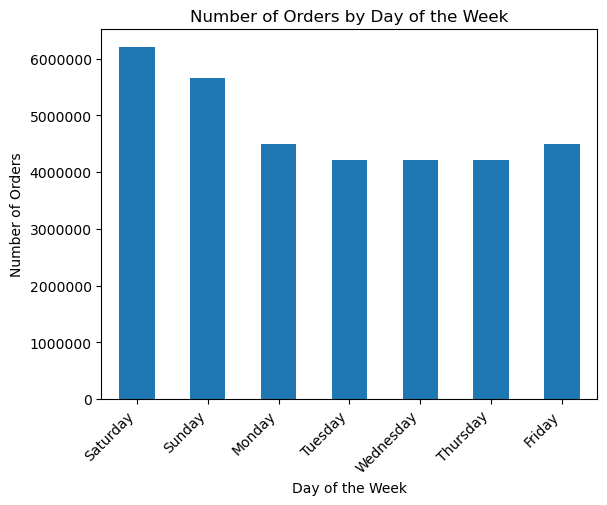

In [9]:
# Creating a bar chart on orders day of week
bar_days_week = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

# Create the mapping of numbers to day names
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 
               4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

bar_days_week = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()
# Set the x-axis labels to the day names using the mapping
bar_days_week.set_xticklabels([day_mapping[i] for i in range(7)], rotation=45)

# Add title and labels
bar_days_week.set_title('Number of Orders by Day of the Week')
bar_days_week.set_xlabel('Day of the Week')
bar_days_week.set_ylabel('Number of Orders')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'number of orders by day of the week.png'), bbox_inches = 'tight')

### 3.Creating Histogramns and Scatterplots 

<Axes: ylabel='Frequency'>

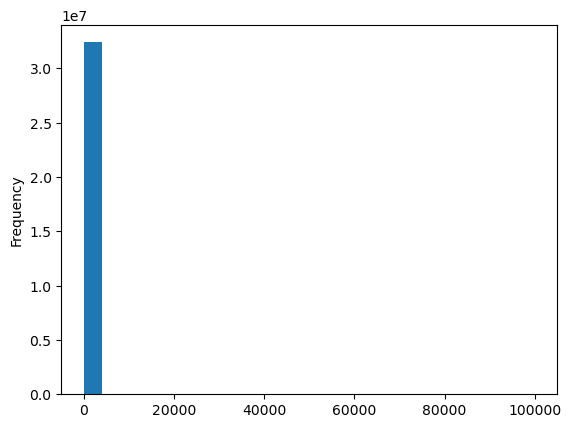

In [65]:
# Creating histogram of the prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [67]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

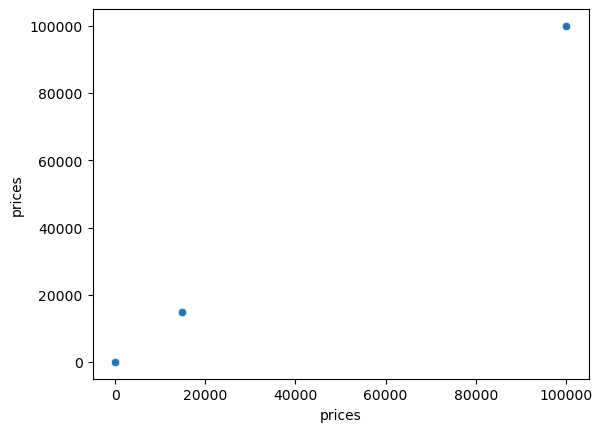

In [73]:
# Creating a scatterplot
sns.scatterplot(x='prices', y='prices', data=ords_prods_merge)

In [77]:
# Checking for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_amount,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer frequency,frequency flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular-frequent customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular-frequent customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High_spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Most orders,25,Regular customer,351.141618,High_spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regularly busy,Most orders,25,Regular customer,170.073770,High_spender,13.0,Regular-frequent customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Least busy,Fewest orders,25,Regular customer,170.073770,High_spender,13.0,Regular-frequent customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regularly busy,Average orders,5,New customer,938.031250,High_spender,7.0,Frequent customer


In [17]:
# Removing outliers and putting them as NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [19]:
ords_prods_merge['prices'].max()

25.0

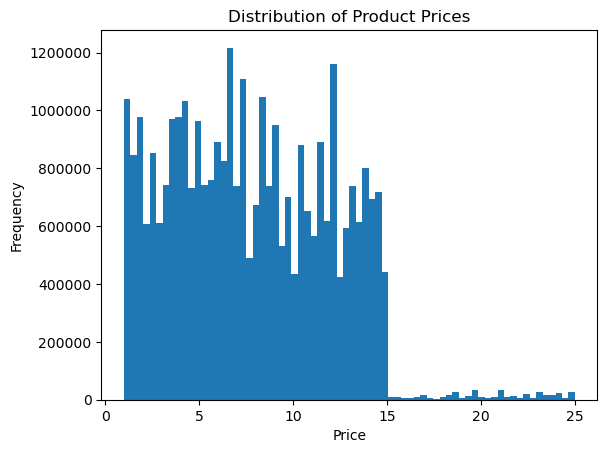

In [25]:
# Corrected histogram

# Create the histogram
hist_prices = ords_prods_merge['prices'].plot.hist(bins=70)

# Add a title
hist_prices.set_title('Distribution of Product Prices')

# Add x and y labels (optional)
hist_prices.set_xlabel('Price')
hist_prices.set_ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution of product prices.png'), bbox_inches = 'tight')
# Show the plot
plt.show()

## 4. Sampling Data 

In [92]:
# Creating a list holding True/False values to the test np.random.rant() <=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [94]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [98]:
# Splitting dataframe into 2 samples

# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [104]:
# Testing out the samples
len(ords_prods_merge)

32404859

In [106]:
len(big) + len(small)

32404859

##### Creation of the charts for prices and orders day of week 

In [109]:
# Taking only the 2 columns necessary for chart

df_2 = small[['orders_day_of_week','prices']]

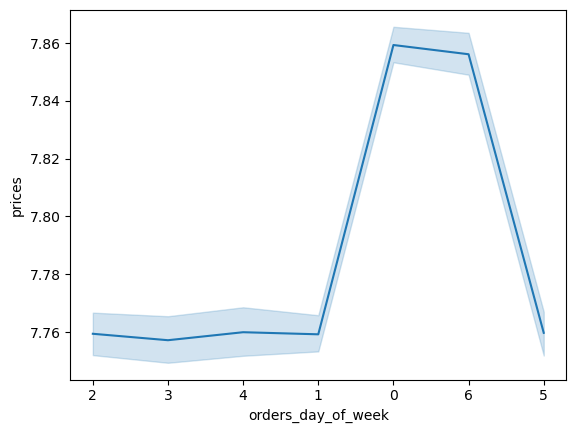

In [111]:
# Creation of the chart
line_prices_days = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [116]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_clean_no_outliers.pkl'))